# Section 4 The MNIST dataset


## Section 1: downloading the data, and visualising it
In XXX somebody decided to start 

The MNIST dataset is used in so tutorials, as it is a great practical example to test your network on. New novel network architectures often show how well they perform on the MNIST dataset. Even if your new network architecture does not perform better, it's often easy to show interesting features using the MNIST dataset. As it's used very often, loading the MNIST dataset is included in your installation of Tensorflow. 

Execute the following code will either load the data, and if it's your first time loading the data it will download the data. 


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Visualising MNIST
mnist

In [3]:
print(mnist)
print(mnist.train)
print(mnist.train.next_batch(5))
images, labels = mnist.train.next_batch(5)
print(images)
print(len(images[0]))
print(28*28)
print(labels)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f614ee38c88>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f6157b461d0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f6157b46208>)
(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]]))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
784
78

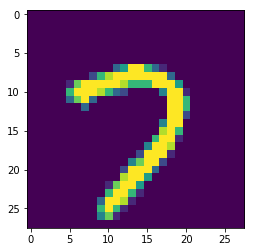

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


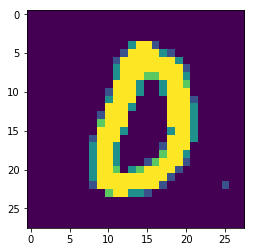

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


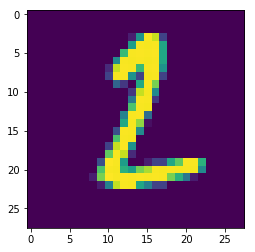

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


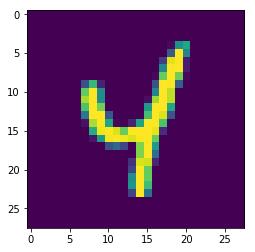

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


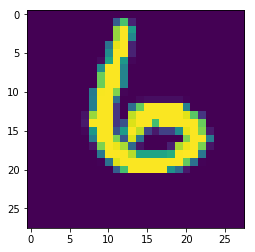

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


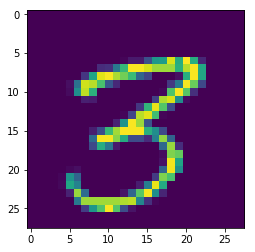

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


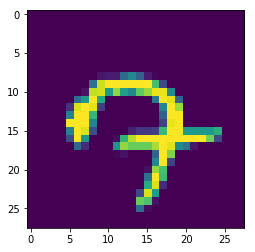

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


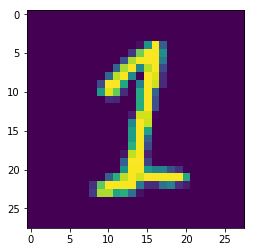

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


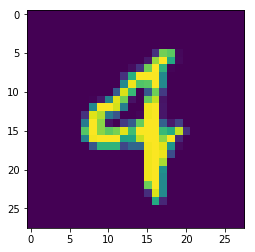

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


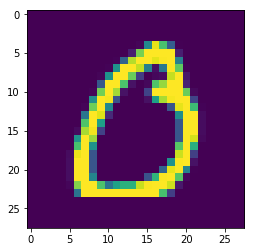

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
images, labels = mnist.train.next_batch(10)
for image, label in zip(images, labels):
    image_reshaped = np.reshape(image,(28,28) ) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
    plt.imshow(image_reshaped)
    plt.show()
    print(label)

In [8]:
print(images)


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


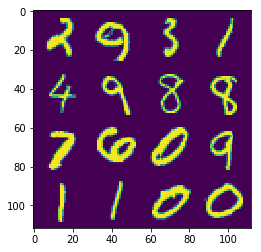

In [11]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    
    
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots ))
    
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                  j * img_w:(j + 1) * img_w] = this_img
    
    return spriteimage

def vector_to_matrix_mnist(mnist_digits):
    """Reshapes normal mnist digit (batch,28*28) to matrix (batch,28,28)"""
    return np.reshape(mnist_digits,(-1,28,28))
matrix = vector_to_matrix_mnist(mnist.train.next_batch(16)[0])
spriteimage = create_sprite_image(matrix)
plt.imshow(spriteimage)

### Nicer visualisations and difficult data
http://www.pinchofintelligence.com/simple-introduction-to-tensorboard-embedding-visualisation/
http://yaroslavvb.blogspot.nl/2011/09/notmnist-dataset.html
![not mnist](http://yaroslavvb.com/upload/notMNIST/nmn.png)

## Section 2: trying the network we made in chapter 3, and comparing it to the state of the art
Now let's try to build a simple neural network to classify these images. By now you are already familiar with the way you build a simple neural network in Tensorflow, so I won't make it very fancy. 


In [ ]:
import tensorflow as tf
LEARNING_RATE = 0.05
x_placeholder = tf.placeholder(tf.float32, [None, 784], name="x_placeholder")
y_placeholder = tf.placeholder(tf.float32, [None, 10], name="y_placeholder")
dense1 = tf.layers.dense(inputs=x_placeholder, units=400, activation=tf.nn.relu, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense1, units=100, activation=tf.nn.relu, name="second_dense_layer")
predicted_class = tf.layers.dense(inputs=dense2, units=10, activation=tf.nn.relu, name="outputprediction_layer")

loss = tf.losses.mean_squared_error(y_placeholder,predicted_class)
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

In [ ]:
BATCH_SIZE = 128
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    opt_res, current_loss = sess.run([optimizer, loss], feed_dict={x_placeholder: batch_xs, y_placeholder: batch_ys})
    print(current_loss)


In [ ]:
TEST_BATCH_SIZE = 1000
batch_xs, batch_ys = mnist.test.next_batch(TEST_BATCH_SIZE)
predicted_chars = sess.run(predicted_class, feed_dict={x_placeholder: batch_xs})
correct_predictions = 0
for truechar, predictedchar in zip(batch_ys, predicted_chars):
    if np.argmax(truechar) == np.argmax(predictedchar): # https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
        correct_predictions += 1
print(correct_predictions)

### Comparing to state of the art
Although what we have right now seems pretty good, it's important to take a look at what the state of the art is doing: http://rodrigob.github.io/are_we_there_yet/build/

As you can see we should not be happy with our results, and continue learning to improve our network. 



## Section 4 or 3?: from activations to probabilities: the softmax function
A question I find way too often on Stackoverflow is how people can go from an activation in their final layer to a probability that the network is "correct". Imagine the network gives you the following activation: `[0.1, 0.3, 0.9, 0.4]`. We probably want guess the network predicted the 3rd class. There are several methods to 'normalize' this outcome. A popular way to do this with neural networks is the [softmax function, or 'normalized exponential function'](https://en.wikipedia.org/wiki/Softmax_function).

The softmax function is: $Softmax(vector_i) \frac{e^{vector_i}}{\sum_j e^{vector_j} }$
The softmax function is a great nonregularity to add to on the final layer of our neural network. 

If you are wondering why in particular the softmax function is such a good function, take a look at the [following Stackoverflow answer](https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization). 




## Section 3: improving the network by understanding optimization functions
Right now we used the mean squared error to determine our loss, and the gradient descent optimization function. 

### Loss functions
Mean squared error not only gives a penalty for not being certain about the class you want, it also gives a penalty for being "confused" about another class. For many classification problems it turns out that it's beneficial to mostly penalise not being very certain about your prediction. 

The list with losses available in Tensorflow [can be found here.](https://www.tensorflow.org/api_docs/python/tf/losses) A short article about them can be found on [this site](https://www.tensorflow.org/api_guides/python/contrib.losses)

A great article about why you should use cross-entropy loss can be [found here](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/). 
### Optimization functions

## Section 5: Understanding and adding convolutional layers and comparing our performance to state of the art. 

A big reason neural networks are so popular nowadays is the **convolutional layer**. Imagine you try to detect if the number 9 is in an image. You probably want to search for specific features: specific roundings on top, straight line at the bottom. The number 9 can be written in many ways, at multiple locations, but these features are always the same. 

A convolutional layer is a trainable **feature detector**. It activates when it detects a certain pattern.

We slide multiple feature detectors over the image and record the result in a new layer. 

What you need to know is that you can represent these weights as a block: 

This means one set of weights is `[width, height, in_dimension, out_dimension]`. 
The way to do this variable in Tensorflow is: 


In [11]:
CONVOLUTIONAL_SHAPE = (5,5,1,32) # W=5, H=5, IN_DIMENSION=1, OUT_DIMENSION=32
weights_filter = tf.Variable(tf.truncated_normal(CONVOLUTIONAL_SHAPE, stddev=0.1), name='conv_weights')


Now there is one thing you should know about how we go over the image with this type of network. We can either apply this filter at every point of the image. This would of course give us the best results, but would result in a very big map in the next layer. It's often good enough to apply this filter at multiple points in the image. This is called the **stride**. 

Another thing you need to know is that if you apply these filters on an image you could apply them only on the real part of the image. You can also say: "I'm still applying my filter on the edges and fill the edges with something random or black". This is called the **padding**. There are two modes for padding: 
- Valid: we don't apply our convolutional filter on the sides of our image
- Same: we do apply our convolutional filter on the sides of the image. If we have stride 1-1 we get the same output in the next layer. 

Now let's apply our filter on an input image. 

In [12]:


x_placeholder = tf.placeholder(dtype=tf.float32, shape=[None,28*28], name="the_input")
#tf.reshape?
input_image = tf.reshape(x_placeholder, (-1,28,28,1)) # Note: -1 means 'whatever is left'
# Note: maybe show that conv2d really expects a 4-dimensional input
print(input_image)
output_conv = tf.nn.conv2d(input_image, weights_filter, strides=[1, 1, 1, 1], padding='SAME')
print(output_conv)

reshaped = tf.reshape(output_conv, (-1,28*28*32))
dense1 = tf.layers.dense(inputs=reshaped, units=2048, activation=tf.nn.relu, name="first_dense_layer")
dense2 = tf.layers.dense(inputs=dense1, units=256, activation=tf.nn.relu, name="second_dense_layer")
network_prediction = tf.layers.dense(inputs=dense2, units=10, activation=tf.nn.relu, name="third_dense_layer")

prediction_pl = tf.placeholder(dtype=tf.float32, shape=[None,10], name="true_label")
loss = tf.losses.softmax_cross_entropy(prediction_pl,network_prediction)
LEARNING_RATE = 0.05
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)


Tensor("Reshape_4:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Conv2D_1:0", shape=(?, 28, 28, 32), dtype=float32)


ValueError: Variable first_dense_layer/kernel already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-7-6f9c073a409b>", line 12, in <module>
    dense1 = tf.layers.dense(inputs=reshaped, units=2048, activation=tf.nn.relu, name="first_dense_layer")
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):


In [ ]:
init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
sess = tf.Session() # https://www.tensorflow.org/api_docs/python/tf/Session
sess.run(init)

In [ ]:
BATCH_SIZE = 128
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
    opt_res, current_loss = sess.run([optimizer, loss], feed_dict={x_placeholder: batch_xs, y_placeholder: batch_ys})
    print(current_loss)


In [ ]:
tf.losses?


One thing we can easily change is the activation function of our network. In [this paper]( https://arxiv.org/abs/1502.01852) authors attempt to solve a more difficult problem: imagenet. In this competition you see many images, and you have to guess what's in the image. To improve upon the state of the art they compare several activation functions. 